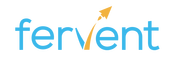
# Estimating Expected Returns (Mean) II - Creating a function
In this walkthrough, you'll learn how to create a function which calculates the expected return on a stock.

You'll be working with the same Facebook stock data, stored in a csv file called `fb_price.csv`

In our case, the file is stored in a folder called `data`, which in turn is stored in a master folder called `iapm_python`.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("fb_price.csv")

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
1409,2017-12-22,177.139999,177.529999,176.229996,177.199997,177.199997,8487000
1410,2017-12-26,176.630005,177.000000,174.669998,175.990005,175.990005,8897300
1411,2017-12-27,176.550003,178.440002,176.259995,177.619995,177.619995,9496100
1412,2017-12-28,177.949997,178.940002,177.679993,177.919998,177.919998,12220800


In [3]:
# Version 1: Calculates daily Expected Return
def getExpectedReturn(df, price_col_name):
    """
    Returns the expected return of a stock given price data.
    """

    # Calculate returns of prices
    returns = df[price_col_name].pct_change(1)  # Make sure you don't call this "return"!
    
    # Calculate the expected return using the mean method
    expected_return = returns.mean()
    
    return expected_return

In [4]:
getExpectedReturn(df=data, price_col_name='Adj Close')

0.0013494618587500079

<div class="alert alert-block alert-info">
<b>Naming Conventions</b>  

It can be tempting to use really short variable names, e.g. `er` instead of `expected_return`.  
<br>
Sometimes it becomes necessary to shorten names, for instance, when equations get really long.  
<br>
As much as possible though, it's good practice to use names that are easy to read and understand.
</div>


In [5]:
# Version 2: Calculates Daily and Annualised Expected Returns,
# annualising by the 'crude' or 'sophisticated' method.
def getExpectedReturn(df, price_col_name, annualised=True, annualise_method='sophisticated'):
    """
    Returns the expected return of a stock given price data.
    """

    # Calculate returns of prices
    returns = df[price_col_name].pct_change(1)
    
    # Calculate the expected return using the mean method
    expected_return_daily = returns.mean()
    
    if annualised:
        if annualise_method == 'sophisticated':
            expected_return_annual = ((1 + expected_return_daily) ** 250) - 1
        elif annualise_method == 'crude':
            # Crude method
            expected_return_annual = expected_return_daily * 250

        return expected_return_annual
    
    else:
        return expected_return_daily

In [6]:
# Annualised Expected Return (sophisticated method)
getExpectedReturn(data, 'Adj Close')

0.40093243279785296

In [7]:
# Daily expected return
getExpectedReturn(data, 'Adj Close', annualised=False)

0.0013494618587500079

In [8]:
# Annualised Expected Return (crude method)
getExpectedReturn(data, 'Adj Close', annualise_method='crude')

0.33736546468750195